En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

In [11]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy.stats import kstest

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (20,10)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_pickle("datos/cars_price1.pkl")
df.head(2) 

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04,Black,8


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16072 entries, 0 to 19235
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ID                16072 non-null  int64   
 1   Price             16072 non-null  int64   
 2   Levy              16072 non-null  int64   
 3   Manufacturer      16072 non-null  object  
 4   Model             16072 non-null  object  
 5   Prod. year        16072 non-null  int64   
 6   Category          16072 non-null  object  
 7   Leather interior  16072 non-null  object  
 8   Fuel type         16072 non-null  object  
 9   Engine volume     16072 non-null  object  
 10  Mileage           16072 non-null  int64   
 11  Cylinders         16072 non-null  float64 
 12  Gear box type     16072 non-null  object  
 13  Drive wheels      16072 non-null  object  
 14  Doors             16072 non-null  category
 15  Color             16072 non-null  object  
 16  Airbags           1607

- ¿Qué diferencia existe entre el error de tipo I y el error de tipo II?

El error de tipo I corresponderia con el falso positivo y el de tipo II con el falso negativo. Por convenio, el H0 parte de la negación de la hipótesis que se quiere probar y H1 parte de la afirmación de la misma.

- ¿Qué es la asimetría?

Es la falta de simetría que presenta una distribución teniendo en cuenta la media. Se determina en la forma que la media, la mediana y la moda de una distribución se relacionan entre si.

- ¿Es vuestra variable respuesta `Price` asimétrica?

In [14]:
df['Price'].skew()

3.5405051912082404

Vemos que nuestro valor es positivo. Significa que es una distribución asimétrica positiva y por lo tanto nuestros datos no son normales.

- ¿Qué tipo de curtosis presenta vuestra variable respuesta `Price`?

In [15]:
kurtosistest(df['Price'])

KurtosistestResult(statistic=66.6716174733583, pvalue=0.0)

Vemos que nuestra variable respuesta tiene una forma leptocúrtica porque el resultado de curtosis es mayor que 0.

In [16]:
df['Price'].unique()

array([13328, 16621,  8467, ..., 56814, 63886, 22075])

- ¿Es vuestra variable respuesta `Price` normal? Demostrarlo visual y analíticamente.

Usamos un histplot para demostrarlo visualmente.

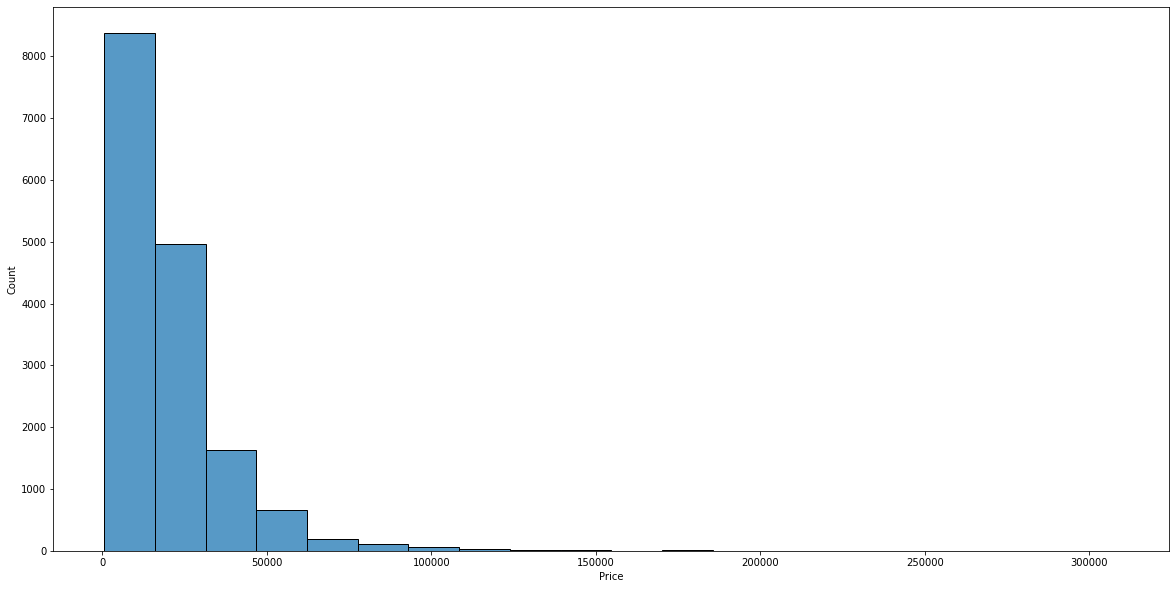

In [17]:
sns.histplot(df['Price'], bins = 20);

Usamos un Test de Kolmogorov-Smirnov para demostrarlo analíticamente ya que nuestra muestra es de más de 5000 registros.

In [18]:
kstest(df['Price'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

> Nuestro *p-valor* < 0.05, podemos rechazar la H0 por lo que los datos son no normales.


> A través del gráfico también podemos decir que nuestros datos son no normales, la gráfica no es ni parecida a una campana de Gauss. 